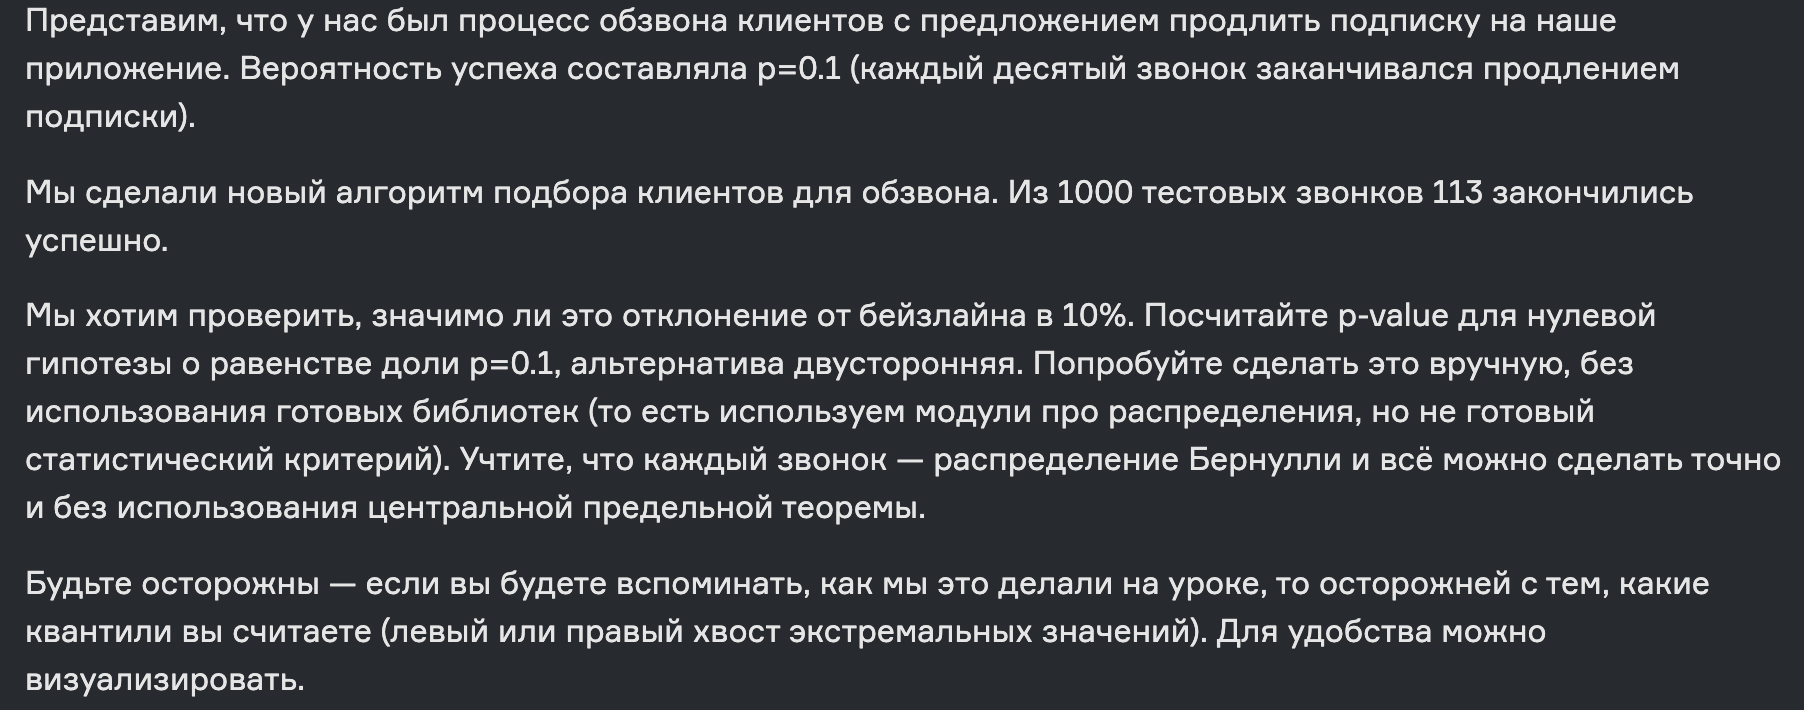

In [86]:
import scipy.stats as stats
import numpy as np

p0 = 0.1
n = 1000
right = 113
left = 87

#Считаем для двусторонней альтернативы p-value
p_right = stats.binom.sf(right-1, n, p0)
p_left = stats.binom.cdf(left, n, p0)
p_value = p_right + p_left
print(f"Точное биномиальное p-value: {p_value:.4f}")



Точное биномиальное p-value: 0.1873


In [87]:
p_ = right/n
z_n = (p_ - p0) / np.sqrt((p0*(1-p0))/n)
p_value = 2 * (1 - stats.norm.cdf(z_n)) # двусторонний; без умножения на два - правый хвост
print(p_value)

0.17058693287144155


In [88]:
stats.binomtest(right, n, p0)

BinomTestResult(k=113, n=1000, alternative='two-sided', statistic=0.113, pvalue=0.17051384223689361)

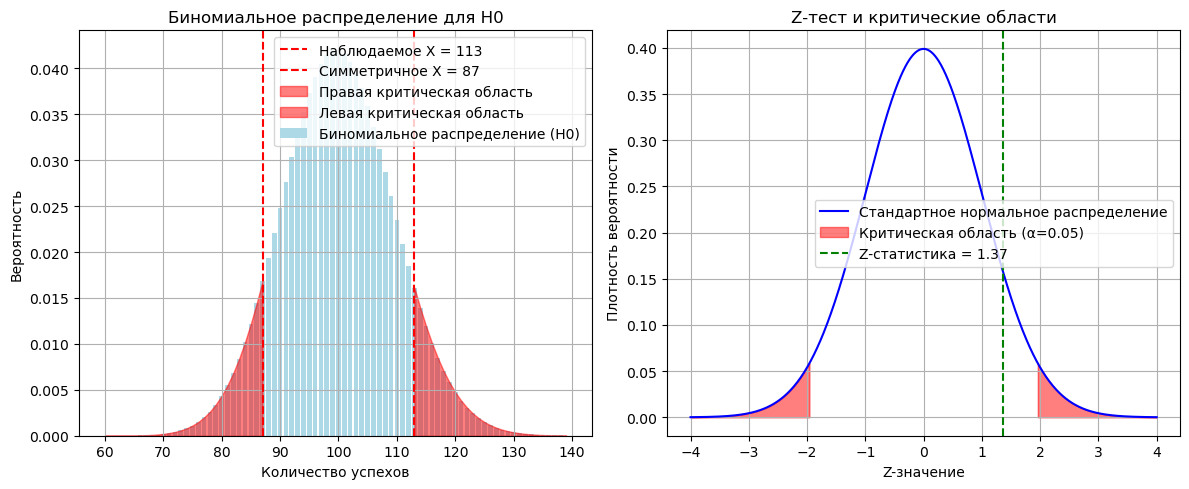

In [89]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


alpha = 0.05
# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 1. Визуализация биномиального распределения
x = np.arange(60, 140)
y = stats.binom.pmf(x, n, p0)

axs[0].bar(x, y, color='lightblue', label="Биномиальное распределение (H0)")
axs[0].axvline(right, color='red', linestyle='dashed', label=f"Наблюдаемое X = {right}")
axs[0].axvline(left, color='red', linestyle='dashed', label=f"Симметричное X = {left}")

axs[0].fill_between(x[x >= right], y[x >= right], color='red', alpha=0.5, label="Правая критическая область")
axs[0].fill_between(x[x <= left], y[x <= left], color='red', alpha=0.5, label="Левая критическая область")

axs[0].set_title("Биномиальное распределение для H0")
axs[0].set_xlabel("Количество успехов")
axs[0].set_ylabel("Вероятность")
axs[0].legend()
axs[0].grid()

# 2. Визуализация Z-теста
x_norm = np.linspace(-4, 4, 1000)
y_norm = stats.norm.pdf(x_norm, 0, 1)

axs[1].plot(x_norm, y_norm, label="Стандартное нормальное распределение", color='blue')

z_critical = stats.norm.ppf(1 - alpha / 2)
x_fill_right = np.linspace(z_critical, 4, 100)
x_fill_left = np.linspace(-4, -z_critical, 100)

axs[1].fill_between(x_fill_right, stats.norm.pdf(x_fill_right, 0, 1), color='red', alpha=0.5, label="Критическая область (α=0.05)")
axs[1].fill_between(x_fill_left, stats.norm.pdf(x_fill_left, 0, 1), color='red', alpha=0.5)

axs[1].axvline(z_score, color='green', linestyle='dashed', label=f"Z-статистика = {z_score:.2f}")

axs[1].set_title("Z-тест и критические области")
axs[1].set_xlabel("Z-значение")
axs[1].set_ylabel("Плотность вероятности")
axs[1].legend()
axs[1].grid()

# Отображение графиков
plt.tight_layout()
plt.show()

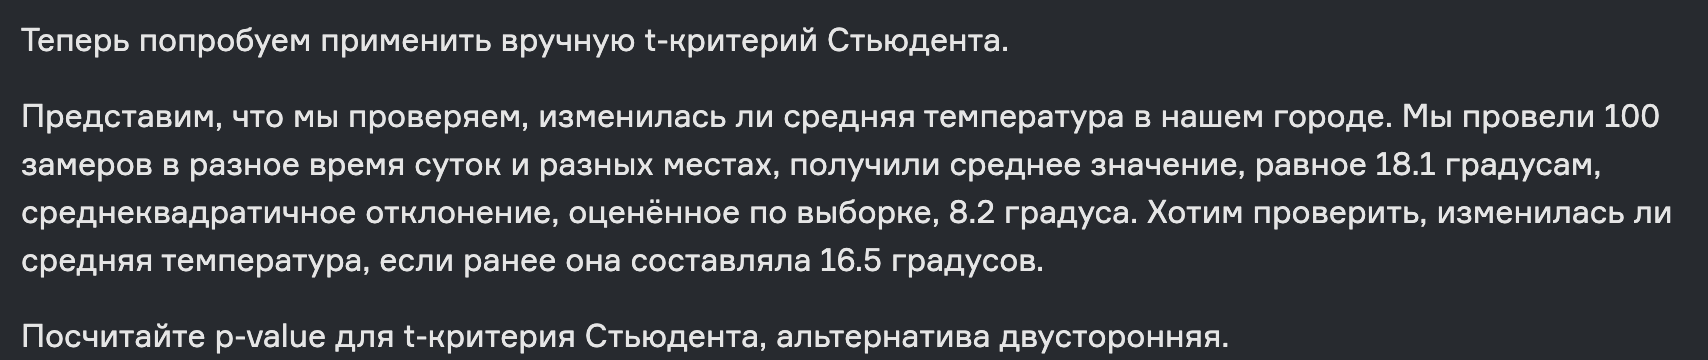

In [90]:
n = 100
mean = 18.1
std = 8.2
mu = 16.5

t_stat = (mean - mu) / (std / np.sqrt(n))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))
print(p_value)

0.05385741608695005


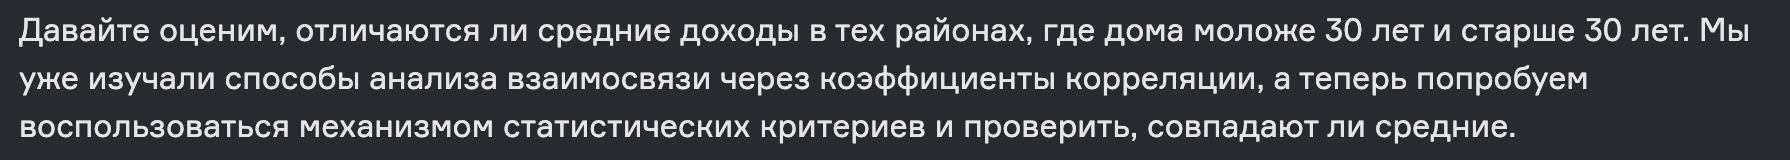

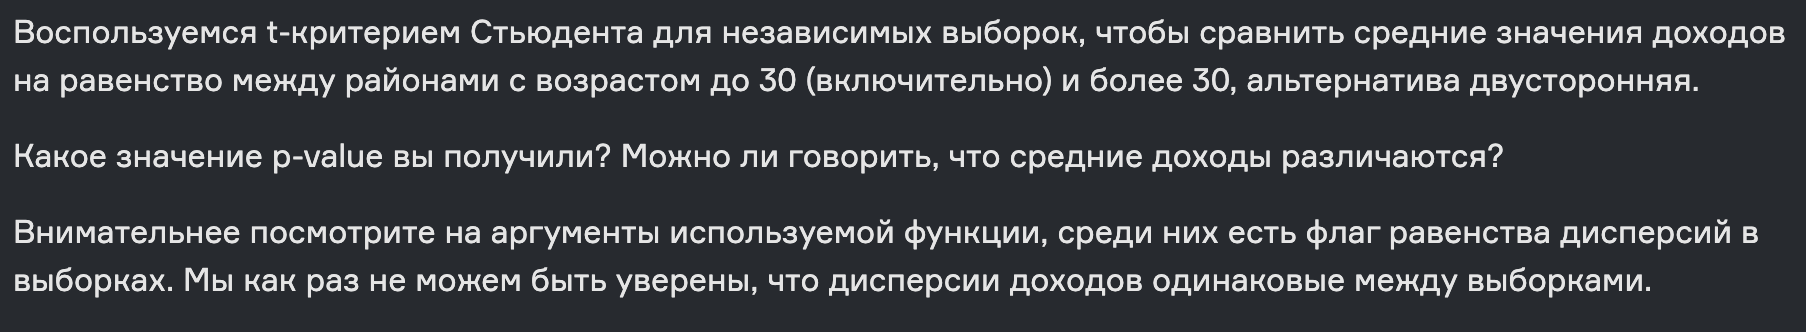

In [91]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [92]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [93]:
df['target'] = target

younger_30 = df[df['HouseAge'] <= 30]['MedInc']
older_30 = df[df['HouseAge'] > 30]['MedInc']

stat, p_val = stats.ttest_ind(younger_30, older_30, equal_var=False) #равенство дисперсий не учитываем
print(stat, p_value)

12.832590060636896 0.05385741608695005


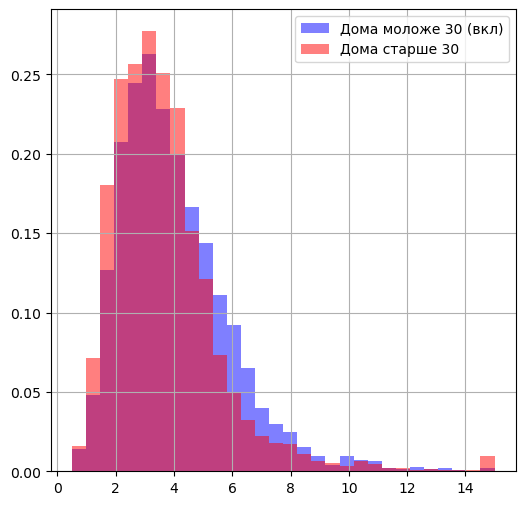

In [94]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.hist(younger_30, bins=30, alpha=0.5, label='Дома моложе 30 (вкл)', color='blue', density=True)
ax.hist(older_30, bins=30, alpha=0.5, label='Дома старше 30', color='red', density=True)
ax.grid()
ax.legend()
plt.show()

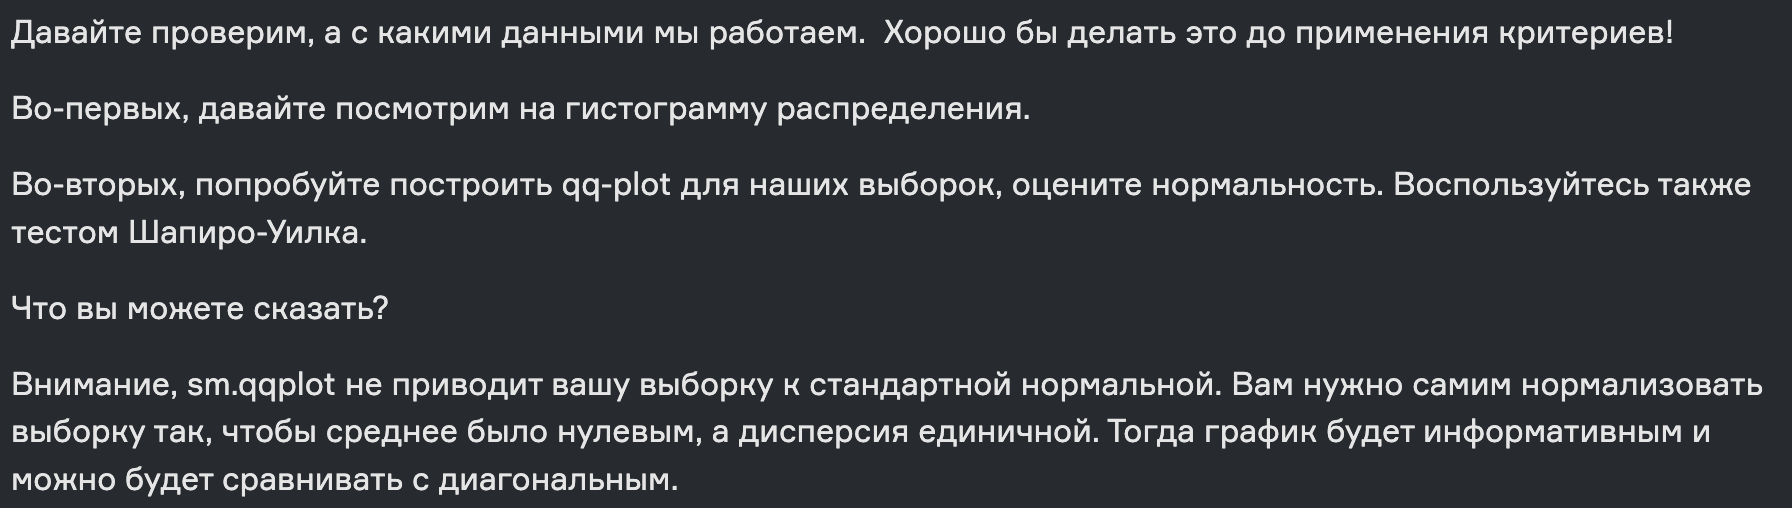

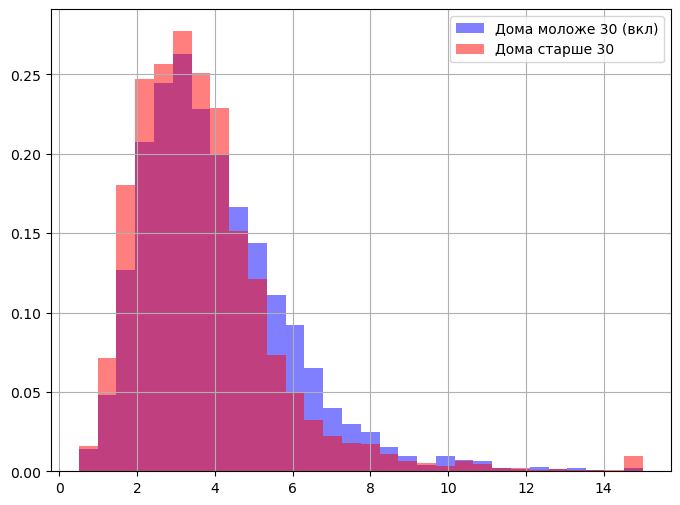

In [95]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(younger_30, bins=30, alpha=0.5, label='Дома моложе 30 (вкл)', color='blue', density=True)
ax.hist(older_30, bins=30, alpha=0.5, label='Дома старше 30', color='red', density=True)
ax.grid()
ax.legend()


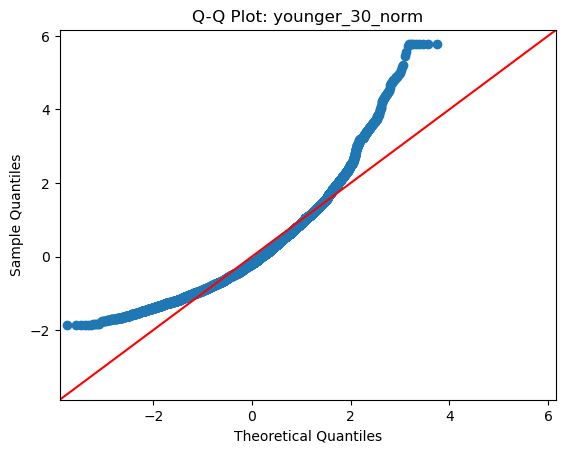

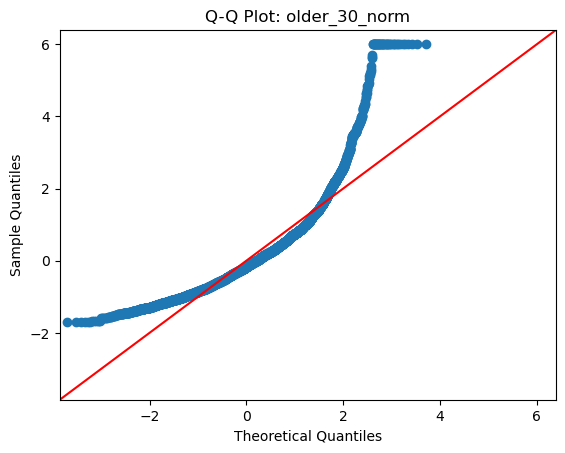

In [96]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Построение QQ-графиков
younger_30_norm = (younger_30 - younger_30.mean()) / younger_30.std()
older_30_norm = (older_30 - older_30.mean()) / older_30.std()

# Generate Q-Q plot for younger_30_norm
sm.qqplot(younger_30_norm, line='45')
plt.title("Q-Q Plot: younger_30_norm")
plt.show()

# Generate Q-Q plot for older_30_norm
sm.qqplot(older_30_norm, line='45')
plt.title("Q-Q Plot: older_30_norm")
plt.show()


In [97]:
stats_y, p_value_y = stats.shapiro(younger_30_norm)
stats_o, p_value_o = stats.shapiro(older_30_norm)

print(f'Для моложе 30 статистика = {stats_y}, p-value = {p_value_y}')
print(f'Для старше 30 статистика = {stats_o}, p-value = {p_value_o}')

Для моложе 30 статистика = 0.9215103111118128, p-value = 7.577799889224268e-60
Для старше 30 статистика = 0.8524968298978389, p-value = 4.890997255775791e-69


/Users/elinagalimova/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11145.
  res = hypotest_fun_out(*samples, **kwds)
/Users/elinagalimova/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9495.
  res = hypotest_fun_out(*samples, **kwds)


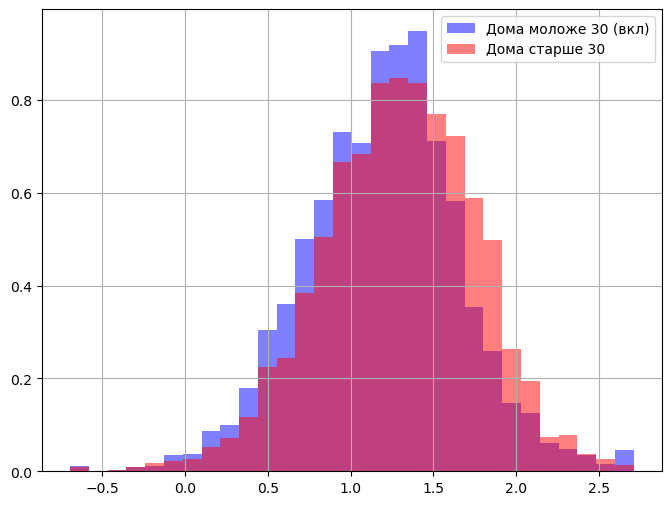

In [98]:
# Логарифмирование переменной MedInc
df["LogMedInc"] = np.log(df["MedInc"])  # Добавление логарифмированного дохода

# Разделение на группы
younger_30 = df[df["HouseAge"] >= 30]["LogMedInc"]
older_30 = df[df["HouseAge"] < 30]["LogMedInc"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(younger_30, bins=30, alpha=0.5, label='Дома моложе 30 (вкл)', color='blue', density=True)
ax.hist(older_30, bins=30, alpha=0.5, label='Дома старше 30', color='red', density=True)
ax.grid()
ax.legend()


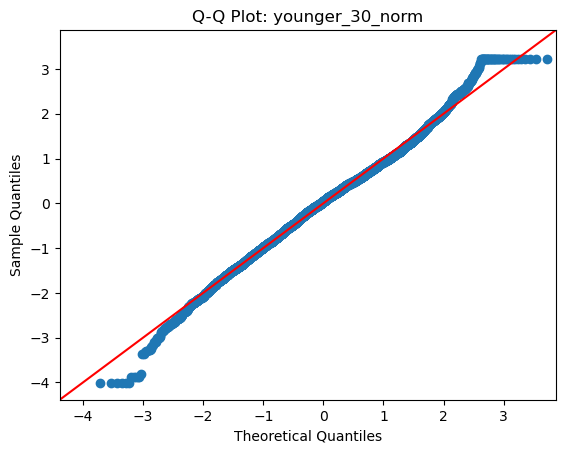

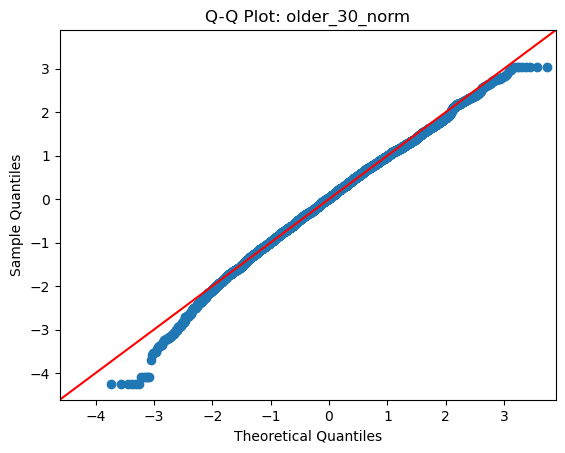

In [99]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Построение QQ-графиков
younger_30_norm = (younger_30 - younger_30.mean()) / younger_30.std()
older_30_norm = (older_30 - older_30.mean()) / older_30.std()

# Generate Q-Q plot for younger_30_norm
sm.qqplot(younger_30_norm, line='45')
plt.title("Q-Q Plot: younger_30_norm")
plt.show()

# Generate Q-Q plot for older_30_norm
sm.qqplot(older_30_norm, line='45')
plt.title("Q-Q Plot: older_30_norm")
plt.show()


In [100]:
stats_y, p_value_y = stats.shapiro(younger_30_norm)
stats_o, p_value_o = stats.shapiro(older_30_norm)

print(f'Для моложе 30 статистика = {stats_y}, p-value = {p_value_y}')
print(f'Для старше 30 статистика = {stats_o}, p-value = {p_value_o}')

Для моложе 30 статистика = 0.995282200251901, p-value = 1.5464757766447572e-17
Для старше 30 статистика = 0.9959578650914017, p-value = 1.2009300107591982e-16


/Users/elinagalimova/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9971.
  res = hypotest_fun_out(*samples, **kwds)
/Users/elinagalimova/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10669.
  res = hypotest_fun_out(*samples, **kwds)
